In [4]:
import pandas as pd

# Load the dataset
file_name = "sff_somaliFootball_historical_data.csv"
df = pd.read_csv(file_name)

# Clean the date column (remove leading/trailing spaces)
df["date"] = df["date"].str.strip()

# Convert date to datetime format
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y", errors="coerce")

# Sort the dataset by date (ascending order)
df = df.sort_values(by="date")

# Extract Home_Score and Away_Score
df[["Home_Score", "Away_Score"]] = df["score"].str.split(" : ", expand=True).astype(int)

# Calculate Home_Goal_Diff and Away_Goal_Diff
df["Home_Goal_Diff"] = df["Home_Score"] - df["Away_Score"]
df["Away_Goal_Diff"] = df["Away_Score"] - df["Home_Score"]

# Determine Result
df["Result"] = df["Home_Goal_Diff"].apply(lambda x: "Win" if x > 0 else "Loss" if x < 0 else "Draw")

# Extract Season from date
df["Season"] = df["date"].dt.year

# Initialize new features
df["Home_Last_5_Wins"] = 0
df["Away_Last_5_Wins"] = 0
df["H2H_Home_Wins"] = 0
df["H2H_Home_Losses"] = 0
df["H2H_Away_Wins"] = 0
df["H2H_Away_Losses"] = 0
df["H2H_Draws"] = 0

# Function to calculate last 5 wins for a team
def calculate_last_5_wins(team, current_date):
    matches = df[(df["date"] < current_date) & 
                 ((df["home"] == team) | (df["away"] == team))]
    last_5_matches = matches.tail(5)
    wins = len(last_5_matches[((last_5_matches["home"] == team) & (last_5_matches["Result"] == "Win")) | 
                              ((last_5_matches["away"] == team) & (last_5_matches["Result"] == "Loss"))])
    return wins

# Function to calculate H2H stats
def calculate_h2h_stats(home_team, away_team, current_date):
    past_matches = df[(df["date"] < current_date) & 
                      (((df["home"] == home_team) & (df["away"] == away_team)) | 
                       ((df["home"] == away_team) & (df["away"] == home_team)))]

    home_wins = len(past_matches[(past_matches["home"] == home_team) & (past_matches["Result"] == "Win")])
    away_wins = len(past_matches[(past_matches["home"] == away_team) & (past_matches["Result"] == "Win")])
    draws = len(past_matches[past_matches["Result"] == "Draw"])

    return home_wins, away_wins, draws

# Calculate features for each row
for i, row in df.iterrows():
    home_team = row["home"]
    away_team = row["away"]
    current_date = row["date"]

    # Last 5 Wins
    df.at[i, "Home_Last_5_Wins"] = calculate_last_5_wins(home_team, current_date)
    df.at[i, "Away_Last_5_Wins"] = calculate_last_5_wins(away_team, current_date)

    # H2H Stats
    home_wins, away_wins, draws = calculate_h2h_stats(home_team, away_team, current_date)
    
    df.at[i, "H2H_Home_Wins"] = home_wins
    df.at[i, "H2H_Away_Wins"] = away_wins
    df.at[i, "H2H_Draws"] = draws
    df.at[i, "H2H_Home_Losses"] = away_wins  # Home team's losses are away team's wins
    df.at[i, "H2H_Away_Losses"] = home_wins  # Away team's losses are home team's wins

# Select and reorder columns
new_columns = [
    "Season", "date", "home", "away", "Home_Score", "Away_Score", 
    "Home_Goal_Diff", "Away_Goal_Diff", "Result", 
    "Home_Last_5_Wins", "Away_Last_5_Wins",
    "H2H_Home_Wins", "H2H_Home_Losses", "H2H_Away_Wins", "H2H_Away_Losses", "H2H_Draws"
]
df = df[new_columns]

# Rename columns for clarity
df.columns = [
    "Season", "Date", "Home_Team", "Away_Team", "Home_Score", "Away_Score", 
    "Home_Goal_Diff", "Away_Goal_Diff", "Result", 
    "Home_Last_5_Wins", "Away_Last_5_Wins",
    "H2H_Home_Wins", "H2H_Home_Losses", "H2H_Away_Wins", "H2H_Away_Losses", "H2H_Draws"
]

# Save to new CSV file
output_file_name = "Updated_somali_football_data.csv"
df.to_csv(output_file_name, index=False)

print("Transformation complete! File saved as:", output_file_name)
print(df.head())  # Preview the transformed dataset


Transformation complete! File saved as: Updated_somali_football_data.csv
   Season       Date              Home_Team      Away_Team  Home_Score  \
0    2012 2012-06-04              Elman FC    Badbaado FC            3   
1    2012 2012-06-05             Sahafi FC     Jeenyo  FC            1   
2    2012 2012-06-07            Heegan S.C     Dekedda SC            1   
3    2012 2012-06-08   Mogadishu City Club    Horseed S.C            1   
4    2012 2012-06-11            Jeenyo  FC       Elman FC            1   

   Away_Score  Home_Goal_Diff  Away_Goal_Diff Result  Home_Last_5_Wins  \
0           1               2              -2    Win                 0   
1           1               0               0   Draw                 0   
2           1               0               0   Draw                 0   
3           1               0               0   Draw                 0   
4           1               0               0   Draw                 0   

   Away_Last_5_Wins  H2H_Home_Wins  H

First 5 rows of dataset:
   Season        Date              Home_Team      Away_Team  Home_Score  \
0    2012  2012-06-04              Elman FC    Badbaado FC            3   
1    2012  2012-06-05             Sahafi FC     Jeenyo  FC            1   
2    2012  2012-06-07            Heegan S.C     Dekedda SC            1   
3    2012  2012-06-08   Mogadishu City Club    Horseed S.C            1   
4    2012  2012-06-11            Jeenyo  FC       Elman FC            1   

   Away_Score  Home_Goal_Diff  Away_Goal_Diff Result  Home_Last_5_Wins  \
0           1               2              -2    Win                 0   
1           1               0               0   Draw                 0   
2           1               0               0   Draw                 0   
3           1               0               0   Draw                 0   
4           1               0               0   Draw                 0   

   Away_Last_5_Wins  H2H_Home_Wins  H2H_Home_Losses  H2H_Away_Wins  \
0        

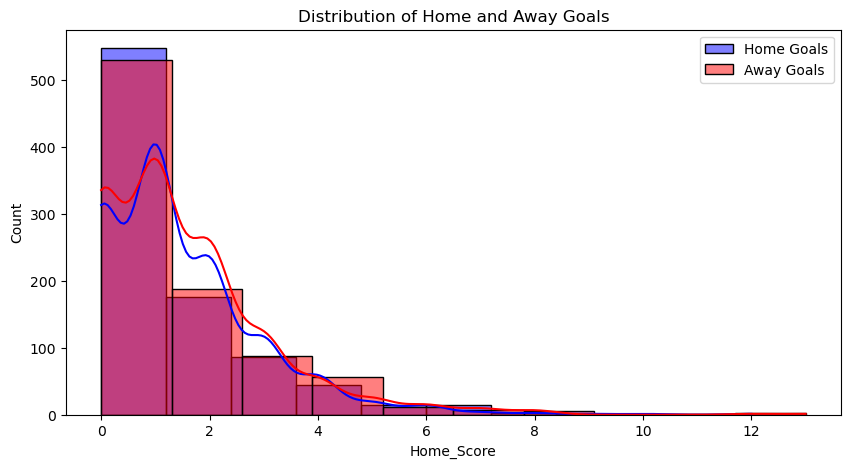

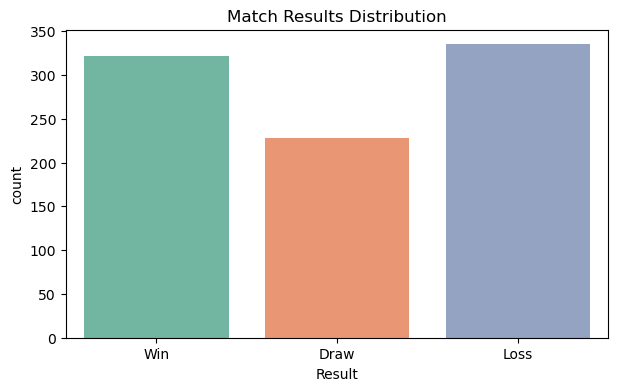

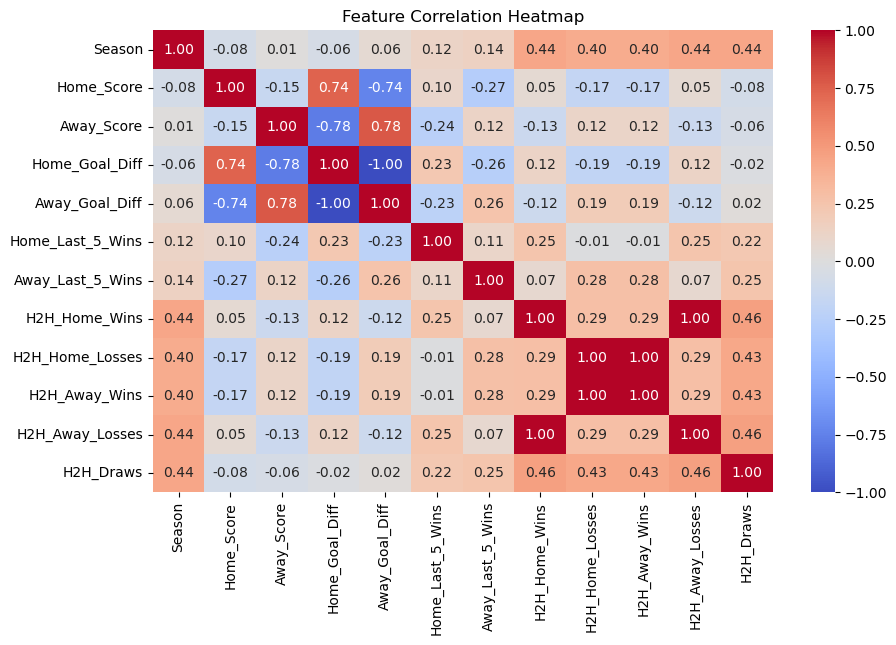

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_name = "Updated_somali_football_data.csv"
df = pd.read_csv(file_name)

# 1️⃣ Check first few rows
print("First 5 rows of dataset:")
print(df.head())

# 2️⃣ Check dataset info
print("\nDataset Information:")
print(df.info())

# 3️⃣ Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 4️⃣ Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# 5️⃣ Plot the distribution of Home and Away Goals
plt.figure(figsize=(10, 5))
sns.histplot(df["Home_Score"], bins=10, color="blue", label="Home Goals", kde=True)
sns.histplot(df["Away_Score"], bins=10, color="red", label="Away Goals", kde=True)
plt.legend()
plt.title("Distribution of Home and Away Goals")
plt.show()

# 6️⃣ Visualize win/draw/loss counts (Fixed Warning)
plt.figure(figsize=(7, 4))
sns.countplot(x="Result", data=df, hue="Result", palette="Set2", legend=False)
plt.title("Match Results Distribution")
plt.show()

# 7️⃣ Correlation heatmap (Handle Non-Numeric Columns)
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=["number"])  # Only keep numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
